# No-Show Appointments Quarterly Report (May 2016)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

To accomidate for the invariably increasing populations especially in big cities, for everyone's needs to be tended to, some type of organization is required. For a lot of places, including medical centers, appointments are made as a type of assurance that patients will be tended to as soon as a vacancy is available. However, many of those appointments are recorded as no-show. This quarterly report investigates and depicts no-show appointments over the course of three months to figure out some reasoning behind those absences by answering a few questions:

1. Are no-show appointments associated with a certain gender?
2. Who in terms of age misses more appointments? (Age Distrubution)
3. How is age affecting patients absence? (Age groups classification)
4. Are chronic illnesses like hypertension and diabetes affecting patients absences?
5. Is alcoholism a prominent factor in patients absences? Are the absences frequent?
6. Do SMS reminders decrease the amount of absences?
7. How does each month compare to the others in terms of No-Show Appointment?
8. Does scheduled day affect the number of no-show appointments if it is a workday or a weekend?
9. Is the period between schedule day and appointment day affecting the number of no-show appointments?

In [1]:
# packages
import pandas as pd # python data analysis toolkit
import numpy as np # for large multi-dimensional arrays and vectorized operations
import matplotlib.pyplot as plt # python plotting library
import seaborn as sns # beautify plotting

# magic words
% matplotlib inline
% config InlineBackend.figure_format = 'retina'

# set plot background style
sns.set(style="darkgrid")

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# read csv file into dataframe
df = pd.read_csv('noshow_appointments.csv');

df.shape # get the number of rows and columns

(110527, 14)

In [3]:
df.head() # view first 5 columns

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info() # get data info (datatypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.isnull().sum().any() # check for null values

False

In [6]:
sum(df.duplicated()) # check for duplicates

0

### Initial Data Assesment

#### Columns
Column names are inconsistent and some columns are misspelled or using British spellling. Changing them to lowercase with underscores for legibility and consistency.

#### Rows
After assessing the data, no null values were found, and no duplication but definitely some misrepresented data. PatientID for instance is portrayed as a float which is allowing scientific notation (numerical constant e). The data need to be changed into a string, as well as for AppointmentID since they're both categorical datatypes. Also, instead of zeros and ones for the six columns before the no-show column, (Yes, No) combination is better for legibility.In addition, we have to convert the day data to datetime to investigate some of the questions above.

### Fixing Column Names

In [7]:
# convert all column names to lowercase
df.rename(str.lower, axis='columns', inplace=True)

# add underscores to columns to replace prior camelcase format
columns = {'patientid': 'patient_id', 'appointmentid': 'appointment_id', 
           'scheduledday': 'scheduled_day', 'appointmentday': 'appointment_day', 'hipertension': 'hypertension',
          'neighbourhood': 'neighborhood', 'handcap': 'handicap', 'no-show': 'no_show'}
df.rename(columns = columns, inplace=True)

# evaluate changes
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Converting String to Date

In [8]:
# convert scheduled_day and appointment_day column to datetime
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

In [9]:
# check values after edit
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null float64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighborhood       110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [10]:
# check data
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Fixing Other Data Types

To prevent a string with this format '######.0', we convert from float to int first; then, to_numeric is used to prevent
ValueError: invalid literal for int() with base 10

In [11]:
# changing patient_id datatype from float to string
df['patient_id'] = pd.to_numeric(df['patient_id']).astype(int).astype(str)

# changing appointment_id datatype from int to string
df['appointment_id'] = df['appointment_id'].astype(str)

In [12]:
# check patient_id values after changing datatype
df['patient_id'].value_counts().head()
df['patient_id'].head()

0     29872499824296
1    558997776694438
2      4262962299951
3       867951213174
4      8841186448183
Name: patient_id, dtype: object

In [13]:
# check appointment_id values after changing datatype
df['appointment_id'].value_counts().head()

5739634    1
5772661    1
5682240    1
5731277    1
5596582    1
Name: appointment_id, dtype: int64

In [14]:
# alter the six columns previously mentioned from (1, 0) to (Yes, No) values
df.iloc[:, -7:-1] = df.iloc[:,-7:-1].replace({1: 'Yes', 0: 'No'})

In [15]:
# check one column after alteration to see if changes were made
df['scholarship'].value_counts()

No     99666
Yes    10861
Name: scholarship, dtype: int64

In [16]:
# check datatypes after all alterations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null object
appointment_id     110527 non-null object
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighborhood       110527 non-null object
scholarship        110527 non-null object
hypertension       110527 non-null object
diabetes           110527 non-null object
alcoholism         110527 non-null object
handicap           110527 non-null object
sms_received       110527 non-null object
no_show            110527 non-null object
dtypes: datetime64[ns](2), int64(1), object(11)
memory usage: 11.8+ MB


## Functions

Considering the usage of the same functionality multiple times across this report, some code truncation is required for readability.

In [17]:
# grouping plot inforamtion to avoid redundancy
def plot_info(plot_title, xlabel_text='', ylabel_text=''):
    """
    Add title, xlabel, and ylabel to a pandas/matplotlib chart.
    plot_title (str): chart title
    xlabel_text (str) - optional: the text for x axis
    ylabel_text (str) - optional: the text for y axis 
    """
    plt.title(plot_title, fontsize=14, fontweight='bold')
    if xlabel_text != '' or ylabel_text != '':
        plt.xlabel(xlabel_text)
        plt.ylabel(ylabel_text);

# grouping and counting by column
def groupby_count(df, cols, count_col):
    """
    Groups data by columns and returns the count of unique non-null values
    df (dataframe): dataframe to extract columns from
    cols (list of str): a list of strings
    count_col (str): arbitrary column to count with no null values
    """
    count = df.groupby(cols).count()[count_col]
    return count
        

<a id='eda'></a>
## Exploratory Data Analysis

### Gender Association with the Number of No-Show Appointments

In [18]:
# grouping data by no_show values (Yes, No) and gender to get the count for each gender
gender_count = groupby_count(df, ['no_show', 'gender'], 'patient_id')
gender_count

no_show  gender
No       F         57246
         M         30962
Yes      F         14594
         M          7725
Name: patient_id, dtype: int64

In [19]:
# compute proportions for each gender and no_show group
# by first calculating the total for 
gender_total = groupby_count(df, 'gender', 'no_show')
gender_total

gender_prop = gender_count/gender_total
gender_prop

no_show  gender
No       F         0.796854
         M         0.800321
Yes      F         0.203146
         M         0.199679
dtype: float64

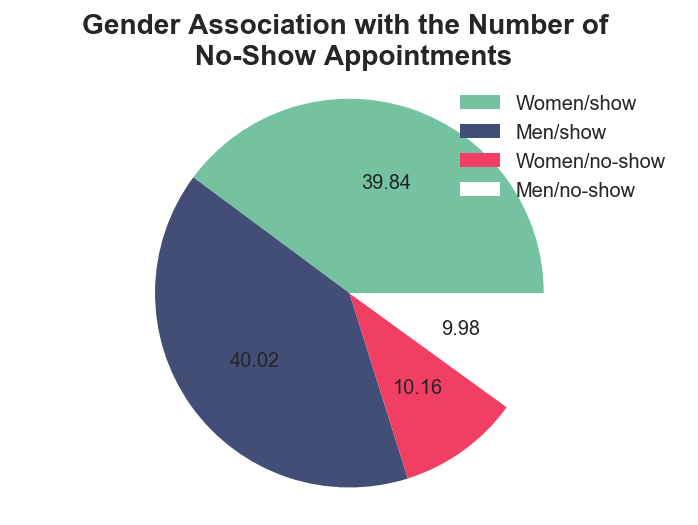

In [20]:
# plot gender association findings
colors = ["#74C2A0", "#424E75", "#F13F63", "#ffffff"]
plt.pie(gender_prop, colors=colors, autopct='%.2f',)
plt.axis('equal')
plot_info('Gender Association with the Number of \n No-Show Appointments')
plt.legend(['Women/show', 'Men/show', 'Women/no-show', 'Men/no-show']);

We can infer from the pie chart above that gender has no effect on the number of no-show appointments. Almost the same proportion of men an women are missing their appointments (approx. 10%).

### Distribution of Ages with No-Show Appointments

In [21]:
# group by the age column if no-show is Yes
df_noshow = df.query('no_show == "Yes"')
age_count = groupby_count(df_noshow, 'age', 'patient_id')
age_count.describe()

count    100.000000
mean     223.190000
std      131.591017
min        1.000000
25%       90.500000
50%      269.500000
75%      320.000000
max      639.000000
Name: patient_id, dtype: float64

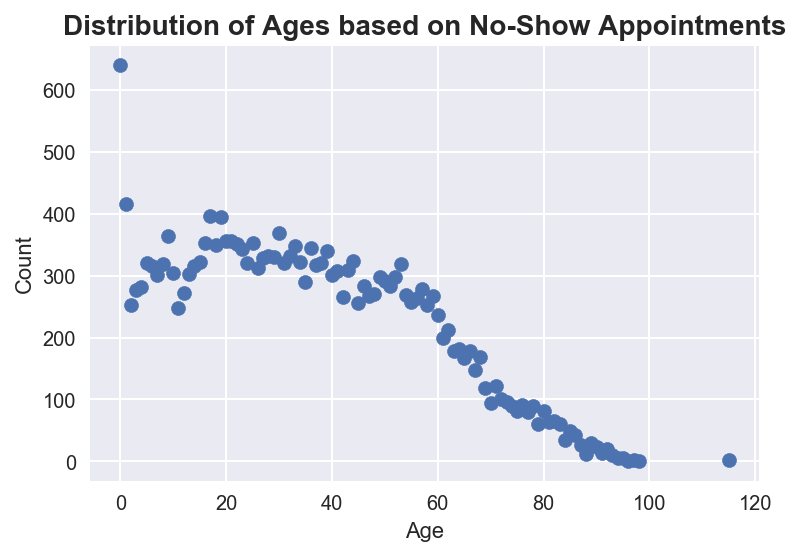

In [22]:
# plot the distribution of ages with no-show appointments
plt.scatter(age_count.index, age_count);
plot_info('Distribution of Ages based on No-Show Appointments', 'Age', 'Count');

Older patients are less likely to miss an appointment. We can also see that the graph is skewed to the right so we can conclude that patients between the ages 20 and 40 seem to miss more appointment than most patinets. And we confirm our findings by calculating the average of ages or finding the median.

In [23]:
# compute the mean and median
_mean = df_noshow['age'].mean()
_median = df_noshow['age'].median()
_mean, _median

(34.31766656212196, 33.0)

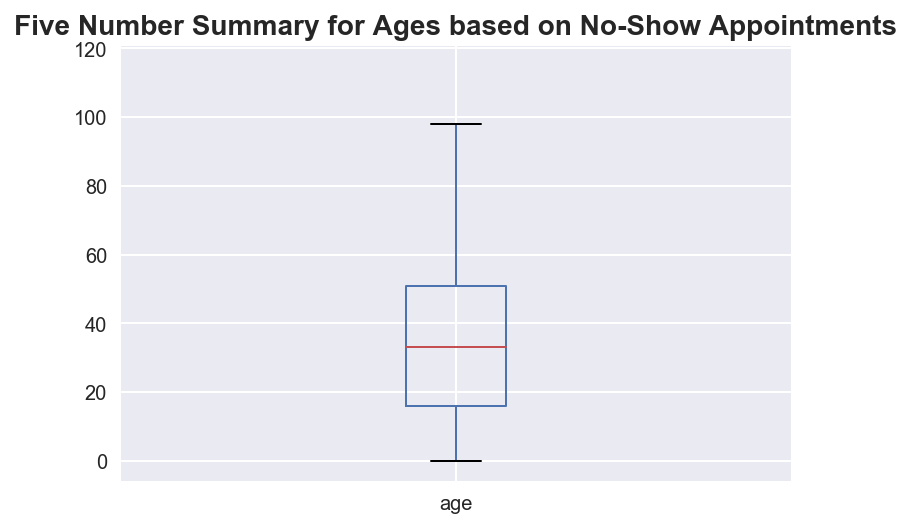

In [24]:
# create a box plot to see the five number summary for age including mean an median (50%) for no-show appointments
df_noshow.boxplot(column='age')
plot_info('Five Number Summary for Ages based on No-Show Appointments')

### Age Groups in Relation to the Number of Missed Appointments

In [25]:
# we first need to create the column with the age groups classification
# https://ieeexplore.ieee.org/document/6416855/

# get the min and max values for first and last values in bin edges below
_min = df['age'].min()
_max = df['age'].max()

_min, _max

(-1, 115)

Since _min = -1 we need to check for inconsistent values in age before creating the age groups classification column

In [26]:
# check for inconsistencies
df['age'].value_counts().describe()

count     104.000000
mean     1062.759615
std       629.528387
min         1.000000
25%       537.500000
50%      1337.500000
75%      1487.000000
max      3539.000000
Name: age, dtype: float64

Only one row appear to have a negative value we need to drop the row with age = -1

In [27]:
# get the index of the row to drop and drop it
i = df.query('age == -1').index
df.drop(df.index[i], inplace=True)

# check if the deletion was successful by reassigning _min and checking the value
_min = df['age'].min()
_min

0

In [28]:
# specify the value edges and names
bin_edges = [_min, 13, 19, 60, _max]

# labels for each age group
age_group_class = ['Child', 'Adolescence', 'Adult', 'Senior']

# create the column
df['age_group_class'] = pd.cut(df['age'], bin_edges, labels=age_group_class)

# check the dataframe
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group_class
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,No,No,No,No,Senior
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,No,No,No,No,No,No,No,Adult
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,No,No,No,No,No,No,No,Senior
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,No,No,No,No,No,No,No,Child
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,No,Yes,Yes,No,No,No,No,Adult


In [29]:
# group by no_show and age_group_class column to get the count of each age group
age_total = groupby_count(df, 'age_group_class', 'age')
age_total

age_group_class
Child          18600
Adolescence     8272
Adult          60353
Senior         19762
Name: age, dtype: int64

To get valuable results we have to calculate proportions instead of just counting since the number of adults is way more than the number of every other category

In [30]:
# calculate the count for each age group only for no-show Appointments. value of 'Yes'
df_noshow = df.query('no_show == "Yes"')
age_count = groupby_count(df_noshow, 'age_group_class', 'age')
age_count

age_group_class
Child           3971
Adolescence     2131
Adult          12572
Senior          3006
Name: age, dtype: int64

In [31]:
# proportion of age groups with missed appointments to attended appointments
age_prop = age_count/age_total
age_prop

age_group_class
Child          0.213495
Adolescence    0.257616
Adult          0.208308
Senior         0.152110
Name: age, dtype: float64

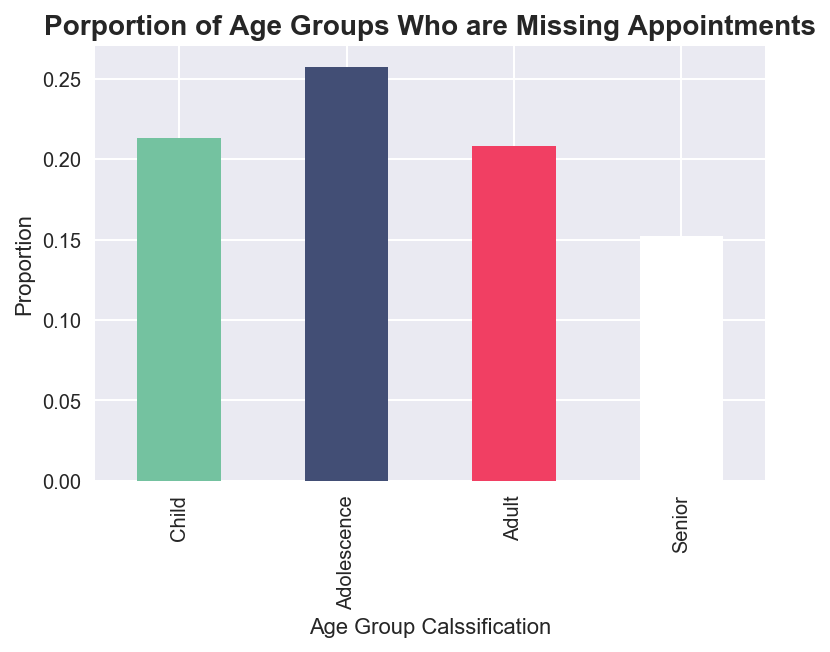

In [32]:
# assign bar colors
colors = ["#74C2A0", "#424E75", "#F13F63", "#ffffff"]

# plot the data in a bar chart
age_prop.plot(kind='bar', color=colors)
plot_info('Porportion of Age Groups Who are Missing Appointments', 'Age Group Calssification', 'Proportion')

Adolescents are the most prone to missing their appointments at approx. 25.7%. While seniors are the least prone to missing their appointments at about 15%. Is it related to personality characteristics for each age group? That is definitely an area to ponder.

### Relationship Between Chronic Illnesses and Missed Appointments

In [33]:
# count the number of patients with both hypertension and diabetes in terms of no-show values
df_chron_noshow = df.query('hypertension == "Yes" & diabetes == "Yes"')
chron_count = groupby_count(df_chron_noshow, 'no_show', 'hypertension')

# count the number of patients with only hypertension in terms of no-show values
df_hyper_noshow = df.query('hypertension == "Yes" & diabetes == "No"')
hyper_count = groupby_count(df_hyper_noshow, 'no_show', 'hypertension')

# count the number of patients with only diabetes in terms of no-show values
df_diabetes_noshow = df.query('diabetes == "Yes" & hypertension == "No"')
diabetes_count = groupby_count(df_diabetes_noshow, 'no_show', 'diabetes')

chron_count, hyper_count, diabetes_count

(no_show
 No     5345
 Yes    1141
 Name: hypertension, dtype: int64, no_show
 No     12684
 Yes     2631
 Name: hypertension, dtype: int64, no_show
 No     1168
 Yes     289
 Name: diabetes, dtype: int64)

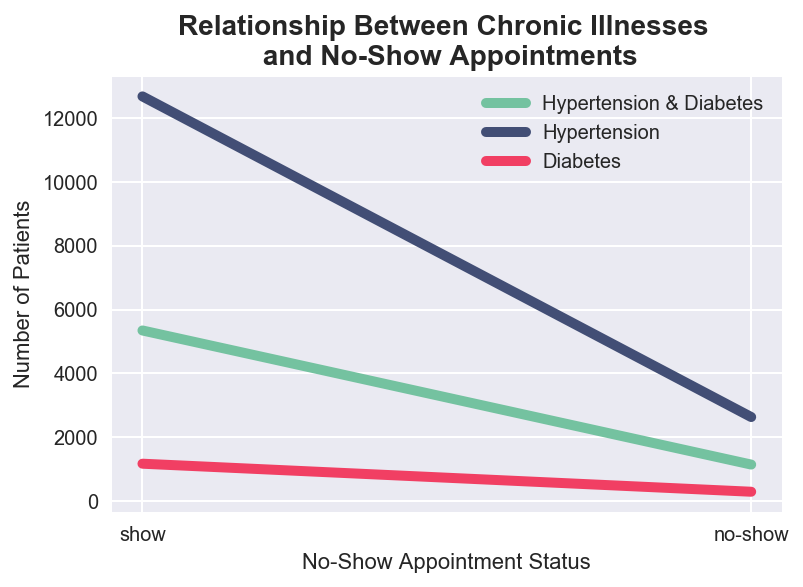

In [34]:
# plot the data to show the relationship between chronic illnesses and 
colors = ["#74C2A0", "#424E75", "#F13F63"]
labels = ['Hypertension & Diabetes', 'Hypertension', 'Diabetes']
plt.plot(['show', 'no-show'], chron_count, color=colors[0], linewidth=5, label=labels[0])
plt.plot(['show', 'no-show'], hyper_count, color=colors[1], linewidth=5, label=labels[1])
plt.plot(['show', 'no-show'], diabetes_count, color=colors[2], linewidth=5, label=labels[2])
plot_info('Relationship Between Chronic Illnesses \n and No-Show Appointments', 
          'No-Show Appointment Status', 'Number of Patients')
plt.legend();

As we can see, patients with hypertension tend to show up more than patients with diabetes or patients with both hypertension and diabetes. Diabetes seems to be the common factor in terms of no-show appointments.

### The Probability that Missing an Appointment is Related to Alcoholism

In [35]:
# get the number of patients who missed their appointments and are alcoholics
df_alcol = df.query('no_show == "Yes" & alcoholism == "Yes"')
df_alcol_count = groupby_count(df_alcol, ['patient_id', 'no_show', 'alcoholism'], 'age').sort_values(ascending=False)
df_alcol_count.head()

patient_id       no_show  alcoholism
34849787522388   Yes      Yes           7
35474987884171   Yes      Yes           6
6489489444136    Yes      Yes           5
849985582638517  Yes      Yes           5
31478734143387   Yes      Yes           4
Name: age, dtype: int64

In [36]:
# get the total number of patients
df_alcol_total = groupby_count(df, 'patient_id', 'age')

# finally get the proportion of patients who missed their appointment and are alcoholics to all patients
df_alcol_prop = df_alcol_count/df_alcol_total
df_alcol_prop.sort_values().describe()

count    520.000000
mean       0.681282
std        0.303633
min        0.030303
25%        0.500000
50%        0.600000
75%        1.000000
max        1.000000
Name: age, dtype: float64

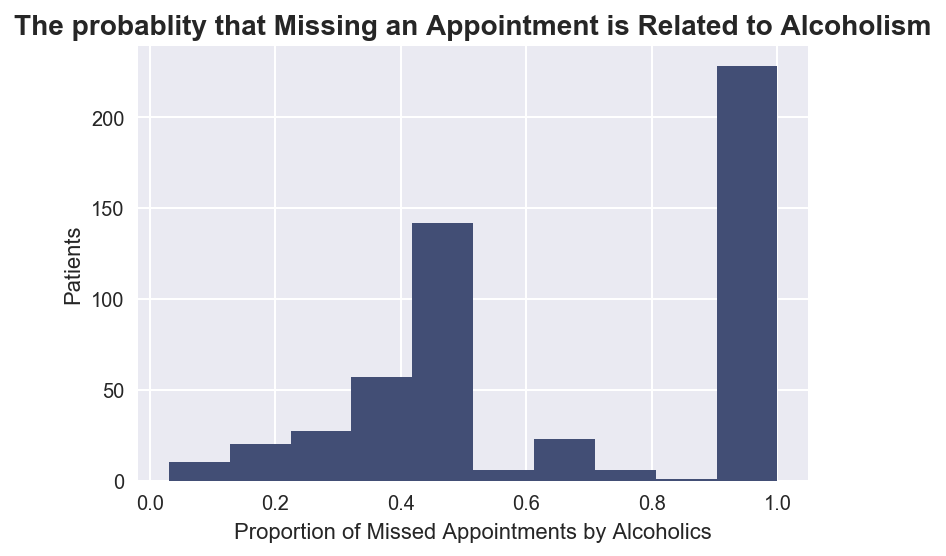

In [37]:
df_alcol_prop.plot(kind='hist', color="#424E75")
plot_info('The probablity that Missing an Appointment is Related to Alcoholism',
         'Proportion of Missed Appointments by Alcoholics', 'Patients')

The probability that a patient missed an appointment because of alcoholism is averaged at about 68%. More than 200 alcoholic patients missed at least one appointment and more than 100 missed half of their appointments.

### The Correlation Between SMS Reminders and the Amount of No-Show Appointments

In [38]:
# claculate the ratio of not receiving SMS reminders to receiving SMS reminder in terms of no-show appointments

# count the number of patients that didn't receive an SMS and didn't show up
sms_reminder_0 = df.query('sms_received == "No" & no_show == "Yes"').count()['patient_id']
sms_reminder_0

12535

In [39]:
# count the number of patients that did receive an SMS and didn't show up
sms_reminder_1 = df.query('sms_received == "Yes" & no_show == "Yes"').count()['patient_id']
sms_reminder_1

9784

In [40]:
# count all sms_received value ('Yes', 'No') for no-show appointments
sms_total = df.query('no_show == "Yes"').count()['sms_received']
sms_total

22319

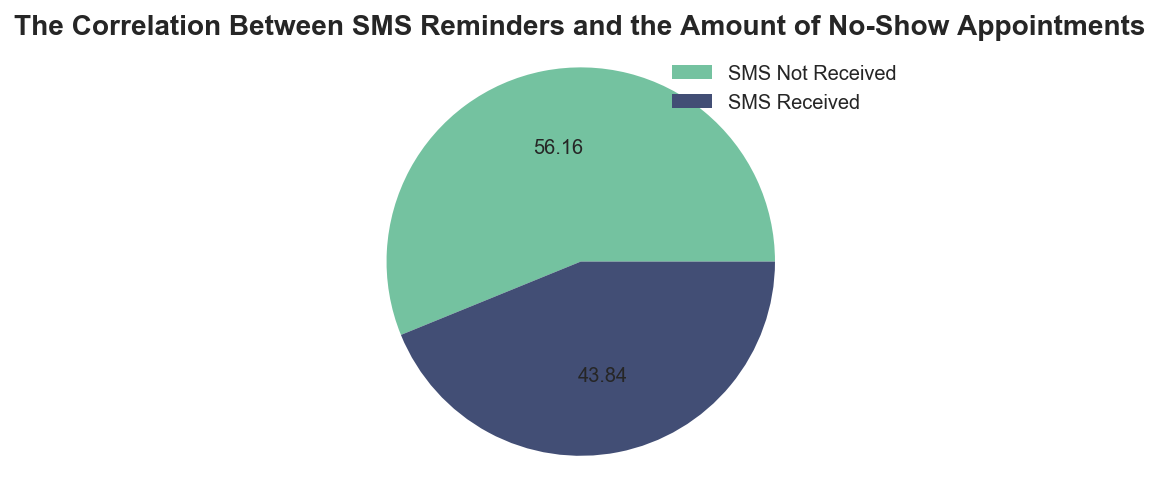

In [41]:
# calculate the ratio
sms_ratio_0 = sms_reminder_0/sms_total
sms_ratio_1 = sms_reminder_1/sms_total
sms_ratio_0, sms_ratio_1

# assigning colors and plotting findings
color = ["#74C2A0", "#424E75"]
plt.pie([sms_ratio_0, sms_ratio_1], colors=colors, autopct='%.2f')
plot_info('The Correlation Between SMS Reminders and the Amount of No-Show Appointments')
plt.axis('equal')
plt.legend(['SMS Not Received', 'SMS Received']);

A patient that didn't receive an SMS reminder is more likely to miss an appointment by about 12%.

### Comparison of No-Show Data Between Months

In [42]:
# create month column
df['month_name_app'] = df['appointment_day'].dt.month_name()

In [43]:
# check that the data is correct and new columns are added
df['month_name_app'].value_counts()

May      80841
June     26450
April     3235
Name: month_name_app, dtype: int64

In [44]:
# group by month for no show appointments
df_noshow = df.query('no_show == "Yes"')
month_count = groupby_count(df_noshow, 'month_name_app', 'appointment_day')
month_count

month_name_app
April      633
June      4882
May      16804
Name: appointment_day, dtype: int64

In [45]:
# calculate proporion of no-show to show by month

# get total
month_total = groupby_count(df, 'month_name_app', 'appointment_day')
month_total

month_name_app
April     3235
June     26450
May      80841
Name: appointment_day, dtype: int64

In [46]:
# compute proportion
month_prop = month_count/month_total
month_prop

month_name_app
April    0.195672
June     0.184575
May      0.207865
Name: appointment_day, dtype: float64

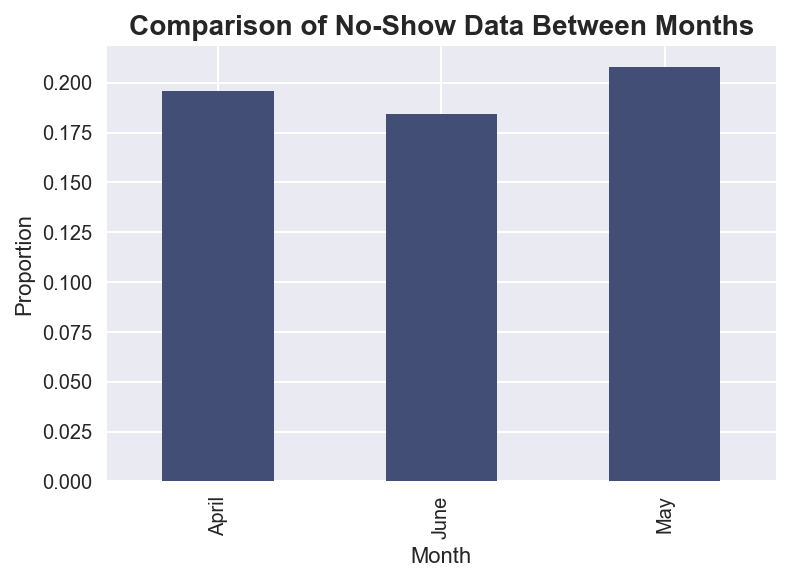

In [47]:
# plot results
month_prop.plot(kind='bar', color="#424E75")
plot_info('Comparison of No-Show Data Between Months', 'Month', 'Proportion')

It seems like patients are missing appointments more during the month of may. But generally about 19% of appointments are missed.

### Correlation Between Weekdays and No-Show Appointments

In [48]:
# create a day_of_week column from each date
df['day_of_week'] = df['appointment_day'].dt.day_name()

In [49]:
# check new column values
df['day_of_week'].value_counts()

Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: day_of_week, dtype: int64

In [50]:
# day number
day = df['appointment_day'].dt.dayofweek
# create a column that evaluates to True if it's a weekend
df['is_weekend'] = np.where(day > 4 , True, False)

In [51]:
# check new column values
df['is_weekend'].value_counts()

False    110487
True         39
Name: is_weekend, dtype: int64

Appointments are accepted on wordays and Saturday. Therefore, we can evaluate the difference between workdays and weekends in terms of no-show appointments

In [52]:
# order days from Monday to Saturday
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], ordered=True)

# group by day_of_week in terms of no_show 
df_noshow = df.query('no_show == "Yes"')
day_count = groupby_count(df_noshow, 'day_of_week', 'patient_id')
day_count

day_of_week
Monday       4690
Tuesday      5152
Wednesday    5093
Thursday     3338
Friday       4037
Saturday        9
Name: patient_id, dtype: int64

Since Saturdays has less appointments in general we need to calculate proportions to get a fair evaluation of the data

In [53]:
# calculate the total number of patient for show and no-show appointments
day_total = groupby_count(df, 'day_of_week', 'patient_id')
day_total

day_of_week
Monday       22714
Tuesday      25640
Wednesday    25867
Thursday     17247
Friday       19019
Saturday        39
Name: patient_id, dtype: int64

In [54]:
# compute proportions of no_show for each day
day_prop = day_count/day_total
day_prop

day_of_week
Monday       0.206481
Tuesday      0.200936
Wednesday    0.196892
Thursday     0.193541
Friday       0.212261
Saturday     0.230769
Name: patient_id, dtype: float64

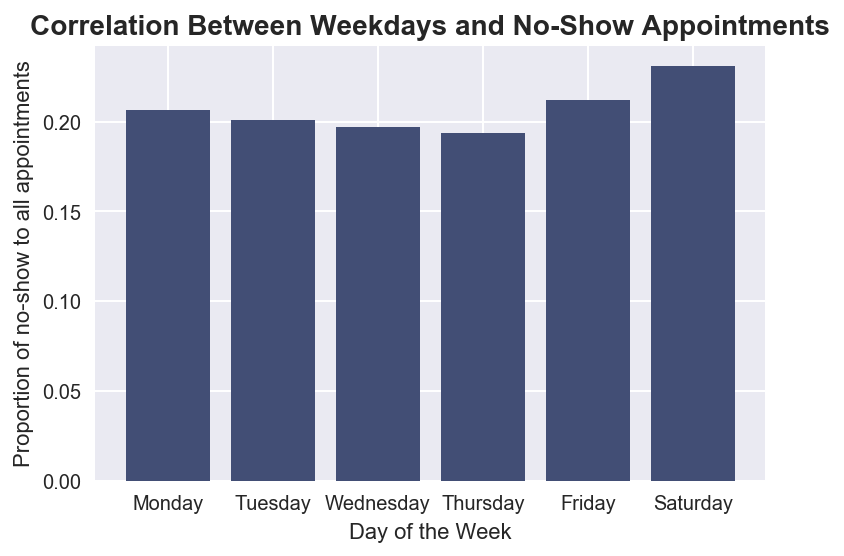

In [55]:
# plot the distribution based on day_of_week first
plt.bar(day_prop.index, day_prop, color="#424E75")
plot_info('Correlation Between Weekdays and No-Show Appointments',
          'Day of the Week', 'Proportion of no-show to all appointments')

There isn't a drastic difference between weedays and weekends in terms of no-show appointments. In comparison, Saturdays seem to have proportionally more no show appointments than wordays by about 3%.

### Relationship Between Period From Schedule Day to Appointment Day and the Number of No-Show Appointments

In [56]:
# subtract the two dates to find the perion between them
df['days_between_sch_app'] = (df['appointment_day'] - df['scheduled_day']).dt.days

# checking the data for inconsistency
df.sort_values('days_between_sch_app', ascending=True).head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group_class,month_name_app,day_of_week,is_weekend,days_between_sch_app
71533,998231581612122,5686628,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,No,No,No,No,No,No,Yes,Senior,May,Thursday,False,-7
72362,3787481966821,5655637,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,No,No,No,No,No,No,Yes,Child,May,Tuesday,False,-2
64175,24252258389979,5664962,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,No,No,No,No,No,No,Yes,Adult,May,Wednesday,False,-2
55226,7896293967868,5715660,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,No,No,No,No,Yes,No,Yes,Adolescence,May,Tuesday,False,-2
27033,7839272661752,5679978,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,No,No,No,No,Yes,No,Yes,Adult,May,Monday,False,-2


After subtracting schedule day from appointment day we find some very strange data. Appointments were missed because the appointment day is before the schedule day, which makes no sense. So we have to drop all rows with negative values after subtraction.

In [57]:
# get the data with negative values
df_negative = df.query('days_between_sch_app < 0')
ind_to_remove = df_negative.index
# drop rows with negative values in days_between_sch_app column
df.drop(ind_to_remove, inplace=True)

# check dataframe after dropped value
df.sort_values('days_between_sch_app', ascending=False).head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group_class,month_name_app,day_of_week,is_weekend,days_between_sch_app
102792,351265918724495,5134233,M,2015-12-07 10:44:07,2016-06-03,73,MARUÍPE,No,Yes,Yes,No,Yes,No,Yes,Senior,June,Friday,False,178
102786,454287126844,5134227,M,2015-12-07 10:43:34,2016-06-03,67,MARUÍPE,No,Yes,Yes,No,No,No,No,Senior,June,Friday,False,178
102789,31123415579473,5134239,F,2015-12-07 10:44:25,2016-06-03,60,SÃO CRISTÓVÃO,No,Yes,Yes,No,No,Yes,No,Adult,June,Friday,False,178
102795,1216586867796,5134197,F,2015-12-07 10:40:59,2016-06-03,27,SÃO CRISTÓVÃO,Yes,No,No,No,No,Yes,Yes,Adult,June,Friday,False,178
102796,9582232334148,5134223,F,2015-12-07 10:43:01,2016-06-03,80,SÃO CRISTÓVÃO,No,Yes,Yes,No,No,Yes,No,Senior,June,Friday,False,178


In [58]:
# get only no_show appointment
df_noshow = df.query('no_show == "Yes"')
days_count = groupby_count(df_noshow, 'days_between_sch_app', 'patient_id')
days_count.head()

days_between_sch_app
0    1113
1    1602
2     644
3    1231
4     872
Name: patient_id, dtype: int64

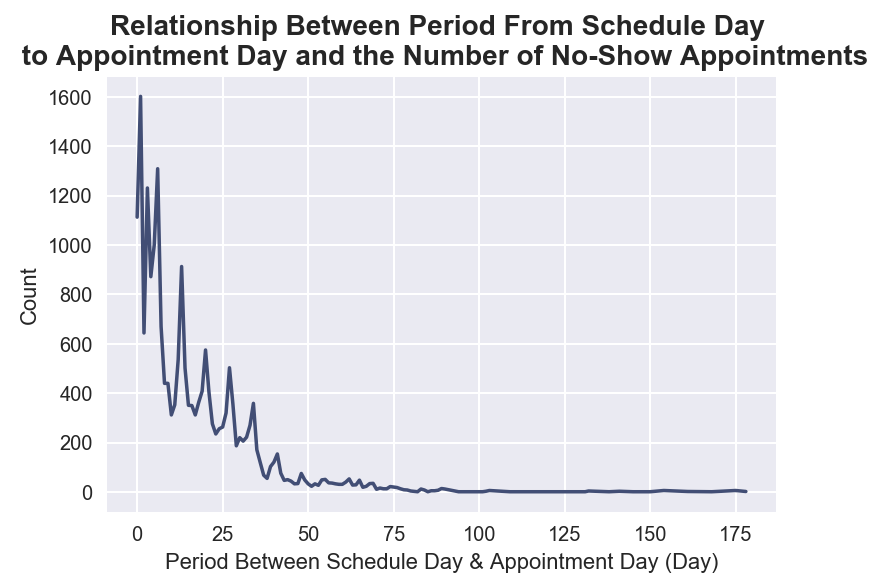

In [59]:
# plot findings
days_count.plot(color="#424E75")
plot_info('Relationship Between Period From Schedule Day \n to Appointment Day and the Number of No-Show Appointments',
         'Period Between Schedule Day & Appointment Day (Day)', 'Count')

The chart shows that the more days elapsed between schedule day and appointment day, the less likely for an appointment to be missed.

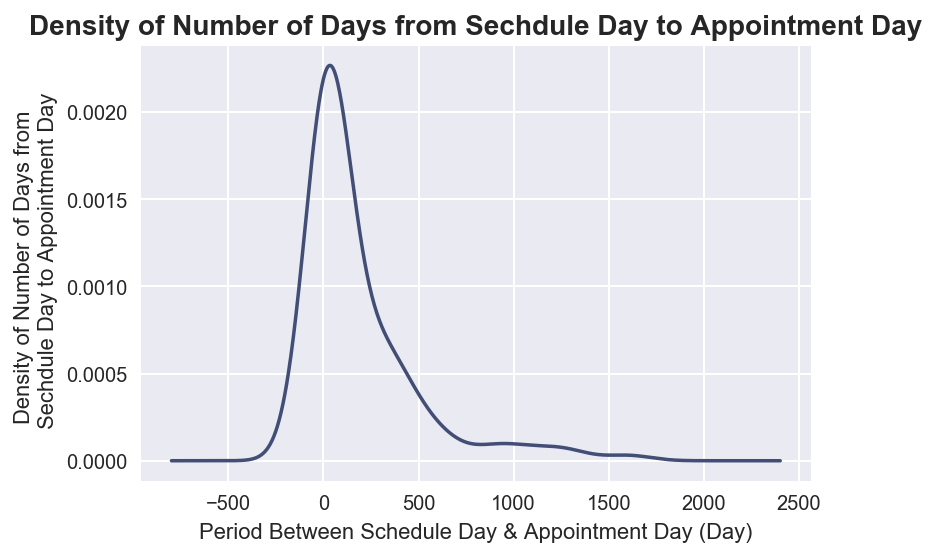

In [60]:
# plot findings
days_count.plot(kind='density', color="#424E75")
plot_info('Density of Number of Days from Sechdule Day to Appointment Day',
         'Period Between Schedule Day & Appointment Day (Day)',
         'Density of Number of Days from \n Sechdule Day to Appointment Day')

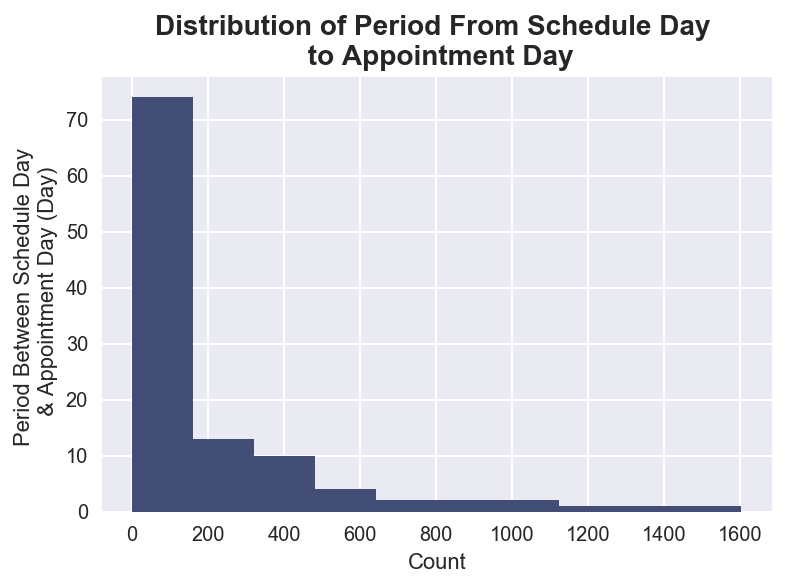

In [61]:
days_count.plot(kind='hist', color="#424E75")
plot_info('Distribution of Period From Schedule Day \n to Appointment Day',
          'Count', 'Period Between Schedule Day \n & Appointment Day (Day)')

If we look at the distribution and the density charts above, we find that the graphs are unimodal and skewed to the right which means, mostly, appointments that were made the same day were missed.

<a id='conclusions'></a>
## Conclusions

**Results:**

The analysis showed that, generally, only a small fraction of scheduled appointments are missed during the three months in question. Moreover, no-show appointment aren't specific to a certain gender, nor they are affected by alcoholism as I expected. Yet, they are slightly affected by SMS reminders received, and by the time elapsed between schedule day and appointment day, which are certainly factors that can be controlled by the medical centers to reduce the amount of no-show appointments. In conclusion, there's no clear reason behind all missed appointments but medical centers can attempt decreasing the negative results by fixing issues from their end.

**Limitations:**

Since most of the columns were categorical, that limited the analysis of the data to mostly counts and proportions. Also the lack of information regarding the type of appointment and the patient's info beyond ID and address disallow clearer analysis. furthermore, adding the address of the hospital could've lead to interesting data regarding the distance between the hospitals and each patient's neighborhood.

**Resources:** N/A